In [28]:
# supress warnings
import warnings

warnings.filterwarnings('ignore')

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [30]:
df = pd.DataFrame(pd.read_csv('Fires.csv'))

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [33]:
# FFMC through BUI are components of FWI so we drop them
df.drop(columns=['FFMC', 'DMC', 'DC', 'ISI', 'BUI'], inplace=True)

In [34]:
# Dropping null valued rows
df.dropna(inplace=True)

In [35]:
# cross-checking for null values
df.isna().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FWI            0
Classes        0
dtype: int64

In [37]:
# checking all types are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FWI          243 non-null    object 
 5   Classes      243 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 13.3+ KB


In [38]:
# converting FWI to float
df = df.astype({'FWI': float})

In [39]:
# cross-checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FWI          243 non-null    float64
 5   Classes      243 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 13.3+ KB


In [40]:
# converting 'Classes' to dummies i.e. 0 or 1
df = pd.get_dummies(df, columns=['Classes'])

In [43]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FWI', 'Classes_fire',
       'Classes_not fire'],
      dtype='object')

In [44]:
# dropping 'Classes_not fire'
df.drop(columns='Classes_not fire', inplace=True)

In [49]:
df['Classes_fire'].value_counts(normalize=True)

1    0.563786
0    0.436214
Name: Classes_fire, dtype: float64

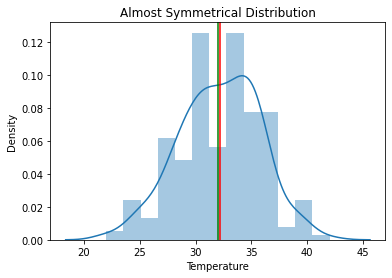

In [174]:
# checking the distribution of temperatures
%matplotlib inline
sns.distplot(df.Temperature)
plt.title('Almost Symmetrical Distribution')
plt.axvline(df.Temperature.mean(), color='red')
plt.axvline(df.Temperature.median(), color='green')
plt.show()

In [54]:
df.corr()

,Temperature,RH,Ws,Rain,FWI,Classes_fire
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.324422,-0.379097
FWI,0.566670,-0.580957,0.032368,-0.324422,1.000000,0.719216
Classes_fire,0.516015,-0.432161,-0.069964,-0.379097,0.719216,1.000000


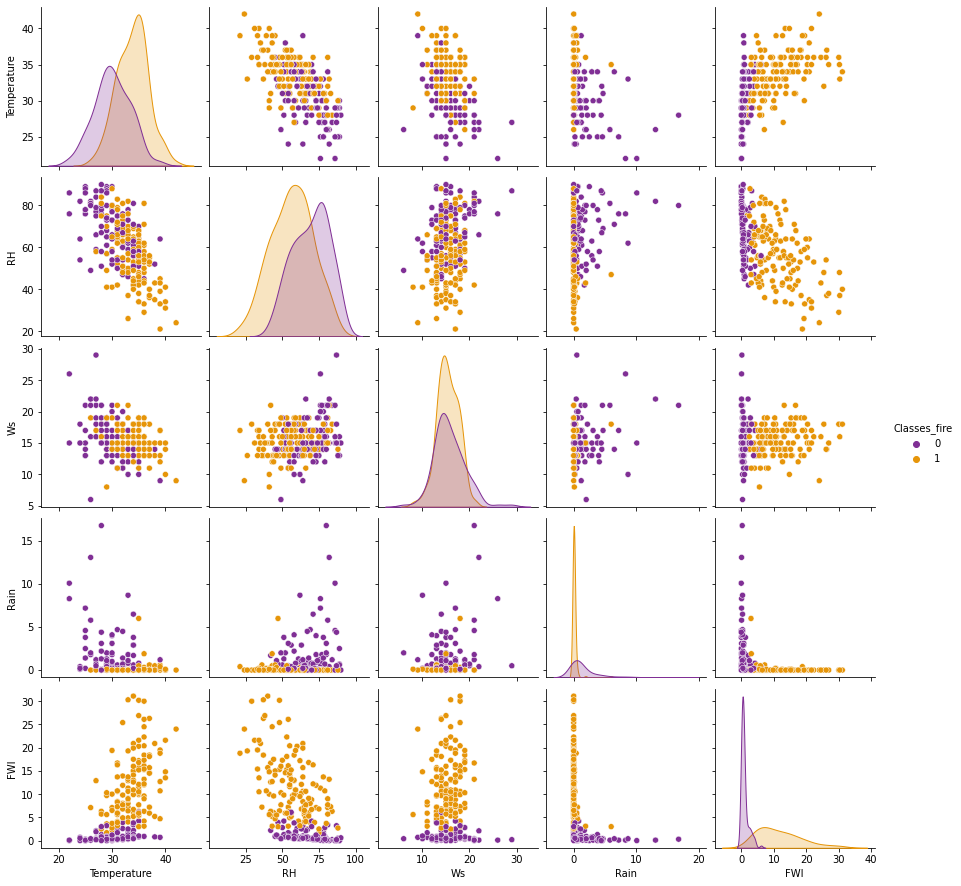

In [61]:
sns.pairplot(df, hue='Classes_fire', palette='CMRmap')

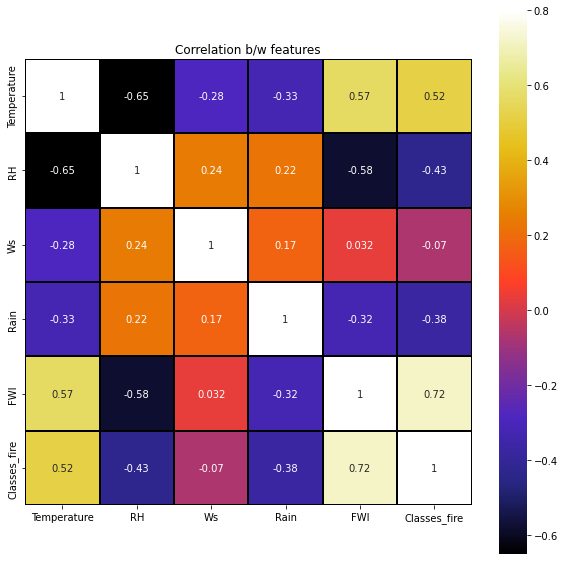

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmax=0.8,
            linewidth=0.01,
            square=True,
            annot=True,
            linecolor='black',
            cmap='CMRmap')
plt.title('Correlation b/w features')
plt.show()

In [64]:
# creating our 'x' values data frame [i.e. features dataframe]
x = df.loc[:, df.columns != 'Classes_fire']
x.head()

,Temperature,RH,Ws,Rain,FWI
0,29,57,18,0.0,0.5
1,29,61,13,1.3,0.4
2,26,82,22,13.1,0.1
3,25,89,13,2.5,0.0
4,27,77,16,0.0,0.5


In [65]:
# creatig the output variables dataframe [i.e. target variable dataframe]
y = df['Classes_fire']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes_fire, dtype: uint8

In [68]:
# creating training set and testing set using train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 1)

In [69]:
# cross-checking the dimensions
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((194, 5), (49, 5), (194,), (49,))

In [70]:
# scaling numerical features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[['Temperature', 'RH', 'Ws', 'Rain', 'FWI']] = sc.fit_transform(x_train[['Temperature', 'RH', 'Ws', 'Rain', 'FWI']])
x_test[['Temperature', 'RH', 'Ws', 'Rain', 'FWI']] = sc.transform(x_test[['Temperature', 'RH', 'Ws', 'Rain', 'FWI']])

In [71]:
x_train.head()

,Temperature,RH,Ws,Rain,FWI
0,-0.916771,-0.286385,0.937876,-0.405035,-0.908436
154,0.474885,-0.352606,0.569560,-0.344170,-0.273179
164,1.866540,-1.081028,-0.903703,-0.039845,-0.340759
110,-0.916771,-0.286385,-0.535387,-0.405035,0.335046
225,-0.360109,0.706918,-0.535387,-0.405035,-0.448888


In [72]:
x_test.head()

,Temperature,RH,Ws,Rain,FWI
67,-0.081778,0.508257,0.201245,-0.405035,0.105272
243,-2.308427,0.177156,-0.167071,-0.283305,-0.908436
206,0.753216,-1.544570,-0.167071,-0.405035,2.659817
122,-0.081778,0.640698,-1.272018,0.021020,-0.948984
89,0.753216,-0.882367,0.937876,-0.405035,3.105848


In [73]:
# importing logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [74]:
logreg

LogisticRegression()

In [75]:
# predicting features using training and testing sets
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

In [76]:
# train set
pd.DataFrame(zip(y_train, y_pred_train), columns=['Actual', 'Predicted'])

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
189,0,0
190,0,1
191,0,0
192,1,1


In [77]:
# test set
pd.DataFrame(zip(y_test, y_pred_test), columns=['Actual', 'Predicted'])

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


In [78]:
# evaluating our model
from sklearn.metrics import accuracy_score, confusion_matrix

In [79]:
accuracy_score(y_train, y_pred_train)

0.9329896907216495

In [80]:
accuracy_score(y_test, y_pred_test)

0.9387755102040817

In [81]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test),
                  index=['Actual Fires', 'Actual No Fires'],
                  columns=['Predicted Fires', 'Predicted No Fires'])
cm

,Predicted Fires,Predicted No Fires
Actual Fires,25,2
Actual No Fires,1,21


In [83]:
(25 + 21) / (25 + 21 + 3)

0.9387755102040817

In [85]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

In [87]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_test)
fpr, tpr, threshold

(array([0.        , 0.07407407, 1.        ]),
 array([0.        , 0.95454545, 1.        ]),
 array([2, 1, 0]))

In [88]:
roc_auc_score(y_test, y_pred_test)

0.9402356902356903

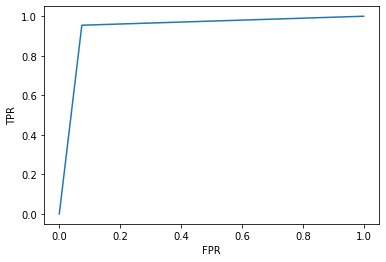

In [100]:
sns.lineplot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [135]:
# finding the best threshold value
numbers = [float(x)/10 for x in range(10)]
cutoff_df = pd.DataFrame(zip(y_test, logreg.predict_proba(x_test)[:,1],
                             np.where(logreg.predict_proba(x_test)[:,1] > 0.5, 1, 0)),
                             columns=['Actual', 'Predicted Probs', 'Predicted'])
cutoff_df.head()

,Actual,Predicted Probs,Predicted
0,1,0.937548,1
1,0,0.063661,0
2,1,0.999999,1
3,0,0.144604,0
4,1,1.000000,1


In [137]:
for i in numbers:
    cutoff_df[i]= cutoff_df['Predicted Probs'].map(lambda x: 1 if x > i else 0)
cutoff_df.head()

,Actual,Predicted Probs,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.937548,1,1,1,1,1,1,1,1,1,1,1
1,0,0.063661,0,1,0,0,0,0,0,0,0,0,0
2,1,0.999999,1,1,1,1,1,1,1,1,1,1,1
3,0,0.144604,0,1,1,0,0,0,0,0,0,0,0
4,1,1.000000,1,1,1,1,1,1,1,1,1,1,1


In [138]:
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cutoff_df1 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in num:
    cm1 = confusion_matrix(cutoff_df.Actual, cutoff_df[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]

In [139]:
cutoff_df1

,prob,accuracy,sensi,speci
0.0,0.0,0.448980,1.000000,0.000000
0.1,0.1,0.673469,1.000000,0.407407
0.2,0.2,0.816327,1.000000,0.666667
0.3,0.3,0.897959,1.000000,0.814815
0.4,0.4,0.959184,1.000000,0.925926
0.5,0.5,0.938776,0.954545,0.925926
0.6,0.6,0.938776,0.954545,0.925926
0.7,0.7,0.938776,0.909091,0.962963
0.8,0.8,0.897959,0.818182,0.962963
0.9,0.9,0.897959,0.772727,1.000000


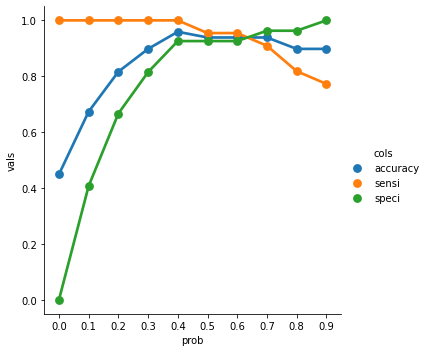

In [167]:
%matplotlib inline
cutoff_dfm = cutoff_df1.melt('prob', var_name='cols', value_name='vals')
sns.catplot(data=cutoff_dfm, x='prob', y='vals', hue='cols', kind='point')
plt.show()

In [173]:
# 2% improvement
preds3 = np.where(logreg.predict_proba(x_test)[:,1] > 0.65, 1, 0)
accuracy_score(y_test, preds3)

0.9591836734693877

# Thank You